In [1]:
from NIX_Testing import NIX_Image_List, NIX_Image, doGridAnalysis, ProgressBar, getDiffractionPattern
from pylab import *
from astropy.io import fits
import os
from matplotlib.gridspec import GridSpec

data_dir = '/home/ydallilar/Documents/NIX/nixDetBackup/persistence_frames/'


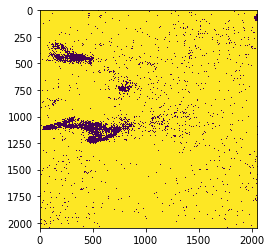

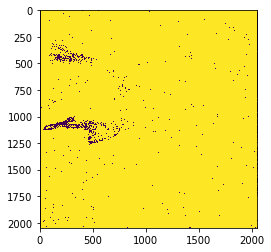

In [2]:
bad1 = fits.open('BP_mask.fits')[0].data
bad2 = fits.open('BP_Mask_R2.fits')[0].data

plt.figure()
plt.imshow(bad1)
plt.figure()
plt.imshow(bad2)

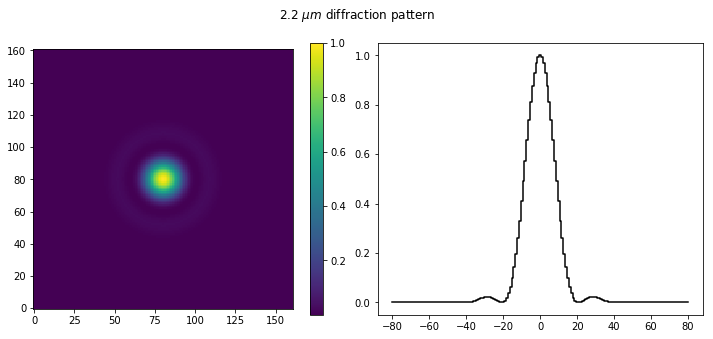

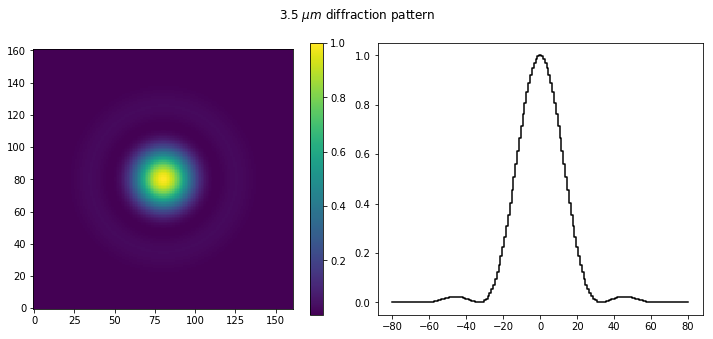

In [3]:
def plot_diffraction(wave):
    fig = figure(figsize=(12,5))
    fig.suptitle("%.1f $\mu m$ diffraction pattern" % wave)
    gs = GridSpec(1, 6, figure=fig)
    _, im = getDiffractionPattern(wave, 13.)
    ax1 = fig.add_subplot(gs[0,:3])
    ax1.imshow(im, origin="lower")
    pcm = ax1.pcolormesh(im)
    fig.colorbar(pcm, ax=ax1)
    ax2 = fig.add_subplot(gs[0,3:])
    ax2.plot(arange(40*4+1)-80,im[80, :], 'k', drawstyle='steps-mid')


plot_diffraction(2.2)
plot_diffraction(3.5)

In [4]:
prefix = 'ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314'

path = '/home/ydallilar/Documents/NIX/nixDetBackup/'

BP_Mask = NIX_Image('BP_mask.fits')
Dark = NIX_Image(path + 'FUN-040/FUN-040-01-1-a/ERIS_NIX_CAL_DARKS224_0014.fits')
config = {'prefix' : prefix, 'data_dir' : data_dir}
NIX_GL = NIX_Image_List(config)

tbl_fmt = '%20s,%40s,%20s'
keywords = ['HIERARCH ESO INS2 NXDF POS']

NIX_GL.printFiltered(keywords, tbl_fmt)
NIX_GL.filter(slice(0,25,1))

 NDX             TEST_ID,                                FILENAME,       INS2_NXDF_POS
0000                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0001.fits,            0.100001
0001                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0002.fits,            0.300004
0002                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0003.fits,            0.499995
0003                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0004.fits,            0.699998
0004                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0005.fits,                 0.9
0005                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0006.fits,            1.100002
0006                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0007.fits,            1.300005
0007                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0008.fits,            1.499996
0008                None,ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers314_0009.fits,            1.69

In [5]:
objects = NIX_GL.getObjects(mask=BP_Mask, thresh=800, minarea=50, force=True)
focuses = NIX_GL.getHeaderValue('HIERARCH ESO INS2 NXDF POS')

#print len(objects)
for i in range(25):
    print i
    out_dir = "out/Pers314_lin/Focus_%02d/" % (focuses[i]*10)
    if not os.path.exists(out_dir): os.makedirs(out_dir)
    title = "Detector focus %.3f (mm) / 13mas_JHK / K Band" % focuses[i]
    strehl_str, fwhm_str = NIX_GL[i].plotDistortionPSF(perc=99.7, mask=BP_Mask, dark=Dark, linearize=True, title=title, strehlWave=2.2,
                               out_ims=out_dir + "Grid_%01d_%01d.fits")
    savefig("out/Pers314_lin/Pers314_Focus_%02d.png" % (focuses[i]*10), bbox_inches='tight')
    with open("out/Pers314_lin/Pers314_Focus_%02d_strehl.txt" % (focuses[i]*10), 'w') as f:
        f.write(strehl_str)
    with open("out/Pers314_lin/Pers314_Focus_%02d_fwhm.txt" % (focuses[i]*10), 'w') as f:
        f.write(fwhm_str)
    close()

    

0


/home/ydallilar/.miniconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ccdproc/core.py:1446: RuntimeWarning: invalid value encountered in greater_equal
  verbose=verbose)
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ccdproc/core.py:1446: RuntimeWarning: invalid value encountered in greater
  verbose=verbose)
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ccdproc/core.py:1446: RuntimeWarning: invalid value encountered in less
  verbose=verbose)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [6]:
prefix = 'ERIS_NIXIMG_TEC_LABCHECKINTERNALFOCUS-Pers313'

config = {'prefix' : prefix, 'data_dir' : data_dir}
NIX_GL = NIX_Image_List(config)

tbl_fmt = '%20s,%40s,%20s'
keywords = ['HIERARCH ESO INS2 NXDF POS']

#NIX_GL.printFiltered(keywords, tbl_fmt)
NIX_GL.filter(slice(26,51,1))

In [7]:
objects = NIX_GL.getObjects(mask=BP_Mask, thresh=1000, minarea=20, force=True)
#print len(objects)
for i in range(25):
    print i
    out_dir = "out/Pers313_lin/Focus_%02d/" % (focuses[i]*10)
    if not os.path.exists(out_dir): os.makedirs(out_dir)
    title = "Detector focus %.3f (mm) / 13mas_LM / L Band" % focuses[i]
    strehl_str, fwhm_str = NIX_GL[i].plotDistortionPSF(perc=99.9, mask=BP_Mask, dark=Dark, linearize=True, title=title, strehlWave=3.5,
                               out_ims=out_dir + "Grid_%01d_%01d.fits")
    savefig("out/Pers313_lin/Pers313_Focus_2_%02d.png" % (focuses[i]*10), bbox_inches='tight')
    with open("out/Pers313_lin/Pers313_Focus_2_%02d_strehl.txt" % (focuses[i]*10), 'w') as f:
        f.write(strehl_str)
    with open("out/Pers313_lin/Pers313_Focus_2_%02d_fwhm.txt" % (focuses[i]*10), 'w') as f:
        f.write(fwhm_str)
    close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [94]:

def show_results(name):

    f_name = "out/%s_lin/%s_Focus_" % (name, name)
    if name == "Pers313":
        f_name = "out/%s_lin/%s_Focus_2_" % (name, name)
        
    data = zeros([5, 5, 25])
    fwhm = zeros([5, 5, 25])
    for i in range(25):
        data[:,:,i] = loadtxt(f_name + "%02d_strehl.txt" % (focuses[i]*10))
        data[:,:,i] = data[::-1,:,i]
        fwhm[:,:,i] = loadtxt(f_name + "%02d_fwhm.txt" % (focuses[i]*10))
        fwhm[:,:,i] = fwhm[::-1,:,i]

    strehl_on_axis = mean(data[1:4,1:4,:], axis=(0,1))
    tmp = data
    tmp[1:4,1:4,:] = np.NaN
    strehl_off_axis = nanmean(tmp[:,:,:], axis=(0,1))
    
    fwhm_on_axis = mean(fwhm[1:4,1:4,:], axis=(0,1))
    tmp = fwhm
    tmp[1:4,1:4,:] = np.NaN
    fwhm_off_axis = nanmean(tmp[:,:,:], axis=(0,1))

    figure(figsize=(10,5))
    plot(focuses, strehl_on_axis, 'b.', label="On Axis")
    plot(focuses, strehl_off_axis, 'r.', label="Off Axis")
    if name == "Pers314":
        reqs = [0.91, 0.82]
    if name == "Pers313":
        reqs = [0.96, 0.92]
    plot([0,5], [reqs[0], reqs[0]], 'b--', label="On axis requirement")
    plot([0,5], [reqs[1], reqs[1]], 'r--', label="Off axis requirement")
    legend(loc=1)
    ylabel("Strehl Ratio")
    xlabel("Focus (mm)")
    savefig(f_name + "strehl.png", bbox_inches="tight")
    
    figure(figsize=(10,5))
    plot(focuses, fwhm_on_axis, 'b.', label="On Axis")
    plot(focuses, fwhm_off_axis, 'r.', label="Off Axis")
    legend()
    ylabel("FWHM (pixels)")
    xlabel("Focus (mm)")
    savefig(f_name + "fwhm.png", bbox_inches="tight")
    
    
    
    ndx = argmin(fwhm_on_axis)
    print focuses[ndx], strehl_on_axis[ndx], strehl_off_axis[ndx], fwhm_on_axis[ndx], fwhm_off_axis[ndx]
                          

#plot(focuses, 1.22*2.2e-6/8./3.*2.35*180*60*60*1000./np.pi/13.+zeros(25), 'r--')


1.499996 0.7946111111111112 0.7634625 4.890079222222222 5.041246


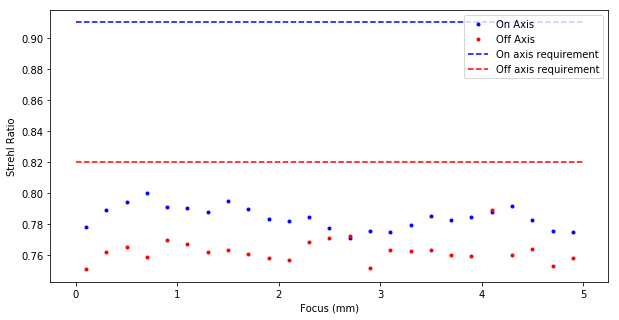

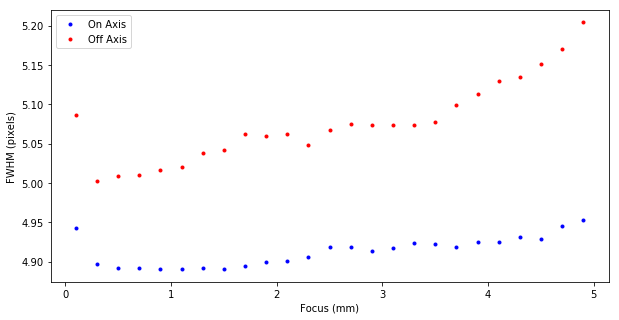

In [95]:
show_results("Pers314")

4.900005 0.9334444444444446 0.9228562499999999 6.822006666666667 6.8499145624999995


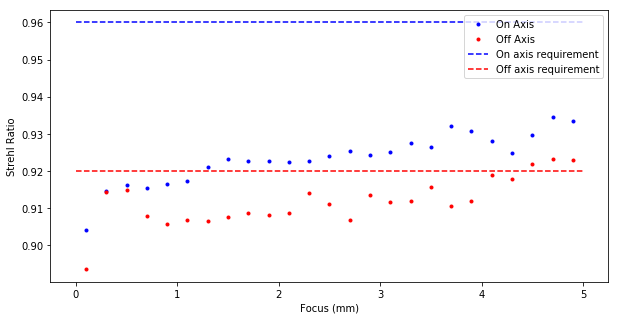

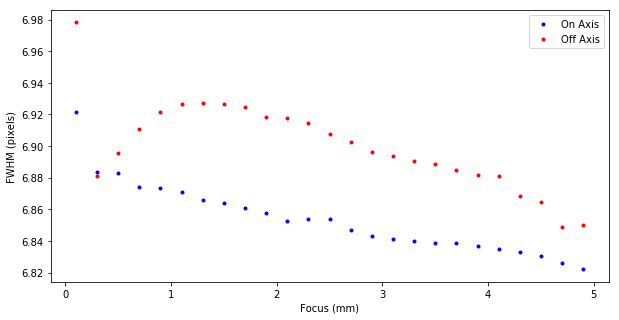

In [96]:
show_results("Pers313")